In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle

In [2]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']

  del save  # hint to help gc free up memory
    
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [3]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)

  return dataset, labels

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [ ]:
#Regularization

# This is to expedite the process 
train_subset = 10000
# This is a good beta value to start with
beta = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data.
    # They're all constants.
    tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
    tf_train_labels = tf.constant(train_labels[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
  
    # Variables    
    # They are variables we want to update and optimize.
    weights = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
  
    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    
    # Original loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = tf_train_labels) )
    
    # Loss function using L2 Regularization
    regularizer = tf.nn.l2_loss(weights)
    loss = tf.reduce_mean(loss + beta * regularizer)
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax( tf.matmul(tf_valid_dataset, weights) + biases )
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

In [14]:
num_steps = 801

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the biases. 
    
    # tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print('Initialized')
    
    for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        
        if (step % 100 == 0):
            print('Loss at step {}: {}'.format(step, l))
            print('Training accuracy: {:.1f}'.format(accuracy(predictions, train_labels[:train_subset, :])))
            
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph dependencies.            
            # You don't have to do .eval above because we already ran the session for the train_prediction
            print('Validation accuracy: {:.1f}'.format(accuracy(valid_prediction.eval(), valid_labels)))
            
    print('Test accuracy: {:.1f}'.format(accuracy(test_prediction.eval(), test_labels))) 

Initialized


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [128,10]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[128,10], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-b8aab2581c10>", line 43, in <module>
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1507, in placeholder
    name=name)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Jay\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [128,10]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[128,10], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
#Regularization with neural network

num_nodes= 1024
batch_size = 128
beta = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    logits_1 = tf.matmul(tf_train_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    # Normal loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits_2, labels = tf_train_labels))
    # Loss function with L2 Regularization with beta=0.01
    regularizers = tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2)
    loss = tf.reduce_mean(loss + beta * regularizers)

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training
    train_prediction = tf.nn.softmax(logits_2)
    
    # Predictions for validation 
    logits_1 = tf.matmul(tf_valid_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    
    valid_prediction = tf.nn.softmax(logits_2)
    
    # Predictions for test
    logits_1 = tf.matmul(tf_test_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    
    test_prediction =  tf.nn.softmax(logits_2)

In [ ]:
#Run it

num_steps = 3001

with tf.Session(graph=graph) as session:
    # tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print("Initialized")
    
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0):
            print("Minibatch loss at step {}: {}".format(step, l))
            print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
            print("")
            
    print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))

In [ ]:
#An extreme case of overfitting. Restricting training data to just a few batches.
#Continuing from the Neural Network with L2 Regularization above

num_steps = 3001

train_dataset_2 = train_dataset[:500, :]
train_labels_2 = train_labels[:500]

with tf.Session(graph=graph) as session:
    # tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print("Initialized")
    
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels_2.shape[0] - batch_size)
        
        # Generate a minibatch.
        batch_data = train_dataset_2[offset:(offset + batch_size), :]
        batch_labels = train_labels_2[offset:(offset + batch_size), :]
        
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0):
            print("Minibatch loss at step {}: {}".format(step, l))
            print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
            
    print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))

In [ ]:
#Introducing dropout

num_nodes= 1024
batch_size = 128
beta = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation.
    logits_1 = tf.matmul(tf_train_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    # Dropout on hidden layer: RELU layer
    # Dropout should only be introduced during training, not evaluation,
    # otherwise evaluation results would be stochastic as well.
    keep_prob = tf.placeholder("float")
    relu_layer_dropout = tf.nn.dropout(relu_layer, keep_prob)
    logits_2 = tf.matmul(relu_layer_dropout, weights_2) + biases_2
    
    # Normal loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits_2, labels = tf_train_labels))
    
    # Loss function with L2 Regularization with beta=0.01
    regularizers = tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2)
    loss = tf.reduce_mean(loss + beta * regularizers)

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training
    train_prediction = tf.nn.softmax(logits_2)
    
    # Predictions for validation (no dropout)
    logits_1 = tf.matmul(tf_valid_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    
    valid_prediction = tf.nn.softmax(logits_2)
    
    # Predictions for test
    logits_1 = tf.matmul(tf_test_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    
    test_prediction =  tf.nn.softmax(logits_2)

In [ ]:
num_steps = 3001

with tf.Session(graph=graph) as session:
    # tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print("Initialized")
    
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : 0.5}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0):
            print("Minibatch loss at step {}: {}".format(step, l))
            print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
            
    print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))

In [ ]:
#Extreme overfitting with dropout

num_steps = 3001
beta = 0.01

train_dataset_2 = train_dataset[:500, :]
train_labels_2 = train_labels[:500]

with tf.Session(graph=graph) as session:
#     tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print("Initialized")
    
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels_2.shape[0] - batch_size)
        
        # Generate a minibatch.
        batch_data = train_dataset_2[offset:(offset + batch_size), :]
        batch_labels = train_labels_2[offset:(offset + batch_size), :]
        
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels,  keep_prob : 0.5}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0):
            print("Minibatch loss at step {}: {}".format(step, l))
            print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
            
    print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))

In [16]:
'''
Trying for better performance

Model:

--> 5 hidden layers NN
    > RELUs
    > Number of nodes decrease by 50% with each hidden layer that is deeper in the neural net
    
--> Overfitting measures
    > L2 Regularization
        ->Learning rate (beta) with exponential decay
    > Dropout
    
--> 10,000 steps or more

'''

import math as math

batch_size = 128
beta = 0.00001

hidden_nodes_1 = 1024
# hidden_nodes_2 = int(hidden_nodes_1 * 0.5)
# hidden_nodes_3 = int(hidden_nodes_1 * np.power(0.5, 2))
# hidden_nodes_4 = int(hidden_nodes_1 * np.power(0.5, 3))
# hidden_nodes_5 = int(hidden_nodes_1 * np.power(0.5, 4))
hidden_nodes_2 = hidden_nodes_1
hidden_nodes_3 = hidden_nodes_1
hidden_nodes_4 = hidden_nodes_1
hidden_nodes_5 = hidden_nodes_1
hidden_nodes_6 = hidden_nodes_1
hidden_nodes_7 = hidden_nodes_1

graph = tf.Graph()
with graph.as_default():

    '''Input Data'''
    # For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_valid_labels = tf.constant(valid_labels)
    tf_test_dataset = tf.constant(test_dataset)
    tf_test_labels = tf.constant(test_labels)

    '''Variables'''
    # Hidden RELU layer 1
    weights_1 = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_nodes_1], 
                                                stddev=math.sqrt(2.0/(image_size*image_size))))
    biases_1 = tf.Variable(tf.zeros([hidden_nodes_1]))

    # Hidden RELU layer 2
    weights_2 = tf.Variable(tf.truncated_normal([hidden_nodes_1, hidden_nodes_2], stddev=math.sqrt(2.0/hidden_nodes_1)))
    biases_2 = tf.Variable(tf.zeros([hidden_nodes_2]))
    
    # Hidden RELU layer 3
    weights_3 = tf.Variable(tf.truncated_normal([hidden_nodes_2, hidden_nodes_3], stddev=math.sqrt(2.0/hidden_nodes_2)))
    biases_3 = tf.Variable(tf.zeros([hidden_nodes_3]))
    
    # Hidden RELU layer 4
    weights_4 = tf.Variable(tf.truncated_normal([hidden_nodes_3, hidden_nodes_4], stddev=math.sqrt(2.0/hidden_nodes_3)))
    biases_4 = tf.Variable(tf.zeros([hidden_nodes_4]))
    
    # Hidden RELU layer 5
    weights_5 = tf.Variable(tf.truncated_normal([hidden_nodes_4, hidden_nodes_5], stddev=math.sqrt(2.0/hidden_nodes_4)))
    biases_5 = tf.Variable(tf.zeros([hidden_nodes_5]))
    
#     # Hidden RELU layer 6
#     weights_6 = tf.Variable(tf.truncated_normal([hidden_nodes_5, hidden_nodes_6], stddev=math.sqrt(2.0/hidden_nodes_5)))
#     biases_6 = tf.Variable(tf.zeros([hidden_nodes_6]))
    
    # Hidden RELU layer 7
#     weights_7 = tf.Variable(tf.truncated_normal([hidden_nodes_6, hidden_nodes_7], stddev=math.sqrt(2.0/hidden_nodes_6)))
#     biases_7 = tf.Variable(tf.zeros([hidden_nodes_7]))
    
    # Output layer
    weights_8 = tf.Variable(tf.truncated_normal([hidden_nodes_5, num_labels], stddev=math.sqrt(2.0/hidden_nodes_5)))
    biases_8 = tf.Variable(tf.zeros([num_labels]))
    
    '''Training computation'''
    
    # Hidden RELU layer 1
    logits_1 = tf.matmul(tf_train_dataset, weights_1) + biases_1
    hidden_layer_1 = tf.nn.relu(logits_1)
    # Dropout on hidden layer: RELU layer
    keep_prob = tf.placeholder("float")
    hidden_layer_1_dropout = tf.nn.dropout(hidden_layer_1, keep_prob)
    
    
    # Hidden RELU layer 2
    logits_2 = tf.matmul(hidden_layer_1_dropout, weights_2) + biases_2
#     logits_2 = tf.matmul(hidden_layer_1, weights_2) + biases_2
    hidden_layer_2 = tf.nn.relu(logits_2)
    # Dropout on hidden layer: RELU layer
    hidden_layer_2_dropout = tf.nn.dropout(hidden_layer_2, keep_prob)
    
    # Hidden RELU layer 3
#     logits_3 = tf.matmul(hidden_layer_2_dropout, weights_3) + biases_3
    logits_3 = tf.matmul(hidden_layer_2, weights_3) + biases_3
    hidden_layer_3 = tf.nn.relu(logits_3)
    # Dropout on hidden layer: RELU layer
    hidden_layer_3_dropout = tf.nn.dropout(hidden_layer_3, keep_prob)
    
    # Hidden RELU layer 4
#     logits_4 = tf.matmul(hidden_layer_3_dropout, weights_4) + biases_4
    logits_4 = tf.matmul(hidden_layer_3, weights_4) + biases_4
    hidden_layer_4 = tf.nn.relu(logits_4)
    # Dropout on hidden layer: RELU layer

    hidden_layer_4_dropout = tf.nn.dropout(hidden_layer_4, keep_prob)
    
    # Hidden RELU layer 5
#     logits_5 = tf.matmul(hidden_layer_4_dropout, weights_5) + biases_5
    logits_5 = tf.matmul(hidden_layer_4, weights_5) + biases_5
    hidden_layer_5 = tf.nn.relu(logits_5)
    # Dropout on hidden layer: RELU layer
    hidden_layer_5_dropout = tf.nn.dropout(hidden_layer_5, keep_prob)
    
#     # Hidden RELU layer 6
# #     logits_6 = tf.matmul(hidden_layer_5_dropout, weights_6) + biases_6
#     logits_6 = tf.matmul(hidden_layer_5, weights_6) + biases_6
#     hidden_layer_6 = tf.nn.relu(logits_6)
#     # Dropout on hidden layer: RELU layer
#     hidden_layer_6_dropout = tf.nn.dropout(hidden_layer_6, keep_prob)
    
#     # Hidden RELU layer 7
# #     logits_7 = tf.matmul(hidden_layer_6_dropout, weights_7) + biases_7
#     logits_7 = tf.matmul(hidden_layer_6, weights_7) + biases_7
#     hidden_layer_7 = tf.nn.relu(logits_7)
#     # Dropout on hidden layer: RELU layer
#     hidden_layer_7_dropout = tf.nn.dropout(hidden_layer_7, keep_prob)
    
    # Output layer
#     logits_8 = tf.matmul(hidden_layer_7_dropout, weights_8) + biases_8
    logits_8 = tf.matmul(hidden_layer_5, weights_8) + biases_8
    
    # Normal loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits_8, labels = tf_train_labels))
    # Loss function with L2 Regularization with decaying learning rate beta
    regularizers = tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2) + \
                   tf.nn.l2_loss(weights_3) + tf.nn.l2_loss(weights_4) + \
                   tf.nn.l2_loss(weights_5) + tf.nn.l2_loss(weights_8) #+ \
#                    tf.nn.l2_loss(weights_8) + tf.nn.l2_loss(weights_8)
    loss = tf.reduce_mean(loss + beta * regularizers)

    '''Optimizer'''
    # Decaying learning rate
    global_step = tf.Variable(0)  # count the number of steps taken.
    start_learning_rate = 0.5
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100, 0.96, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    # Predictions for the training
    train_prediction = tf.nn.softmax(logits_8)
    
    # Predictions for validation 
    valid_logits_1 = tf.matmul(tf_valid_dataset, weights_1) + biases_1
    valid_relu_1 = tf.nn.relu(valid_logits_1)
    
    valid_logits_2 = tf.matmul(valid_relu_1, weights_2) + biases_2
    valid_relu_2 = tf.nn.relu(valid_logits_2)
    
    valid_logits_3 = tf.matmul(valid_relu_2, weights_3) + biases_3
    valid_relu_3 = tf.nn.relu(valid_logits_3)
    
    valid_logits_4 = tf.matmul(valid_relu_3, weights_4) + biases_4
    valid_relu_4 = tf.nn.relu(valid_logits_4)
    
    valid_logits_5 = tf.matmul(valid_relu_4, weights_5) + biases_5
    valid_relu_5 = tf.nn.relu(valid_logits_5)
    
#     valid_logits_6 = tf.matmul(valid_relu_5, weights_6) + biases_6
#     valid_relu_6 = tf.nn.relu(valid_logits_6)
    
#     valid_logits_7 = tf.matmul(valid_relu_6, weights_7) + biases_7
#     valid_relu_7 = tf.nn.relu(valid_logits_7)
    
    valid_logits_8 = tf.matmul(valid_relu_5, weights_8) + biases_8
    
    valid_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = valid_logits_8, labels = tf_valid_labels))
    valid_loss = tf.reduce_mean(valid_loss + beta * regularizers)
    
    valid_prediction = tf.nn.softmax(valid_logits_8)
    
    # Predictions for test
    test_logits_1 = tf.matmul(tf_test_dataset, weights_1) + biases_1
    test_relu_1 = tf.nn.relu(test_logits_1)
    
    test_logits_2 = tf.matmul(test_relu_1, weights_2) + biases_2
    test_relu_2 = tf.nn.relu(test_logits_2)
    
    test_logits_3 = tf.matmul(test_relu_2, weights_3) + biases_3
    test_relu_3 = tf.nn.relu(test_logits_3)
    
    test_logits_4 = tf.matmul(test_relu_3, weights_4) + biases_4
    test_relu_4 = tf.nn.relu(test_logits_4)
    
    test_logits_5 = tf.matmul(test_relu_4, weights_5) + biases_5
    test_relu_5 = tf.nn.relu(test_logits_5)
    
#     test_logits_6 = tf.matmul(test_relu_5, weights_6) + biases_6
#     test_relu_6 = tf.nn.relu(test_logits_6)
    
#     test_logits_7 = tf.matmul(test_relu_6, weights_7) + biases_7
#     test_relu_7 = tf.nn.relu(test_logits_7)
    
    test_logits_8 = tf.matmul(test_relu_5, weights_8) + biases_8
    
    test_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = test_logits_8, labels = tf_test_labels))
    test_loss = tf.reduce_mean(test_loss + beta * regularizers)
    
    test_prediction = tf.nn.softmax(test_logits_8)

In [91]:
import matplotlib.pyplot as plt

num_steps = 10001

#lists to hold loss values for plotting
l_train = []
l_val = []
l_test = []

#lists to hold accuracy values
train_accuracy = []
valid_accuracy = []
test_accuracy = []

with tf.Session(graph=graph) as session:
#     tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print("Initialized")
    
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : 0.9}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 50 == 0):
#             print("Minibatch loss at step {}: {}".format(step, l))
#             print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
#             print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
            
            train_accuracy.append(accuracy(predictions, batch_labels))
            valid_accuracy.append(accuracy(valid_prediction.eval(), valid_labels))
            test_accuracy.append(accuracy(test_prediction.eval(), test_labels))
            print(step, end = ' ')
            
#             print("")
            l_train.append(l)
            l_val.append(valid_loss.eval())
            l_test.append(test_loss.eval())
            
    print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))
    

Initialized
0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900 5950 6000 6050 6100 6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 8050 8100 8150 8200 8250 8300 8350 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950 10000 Test 

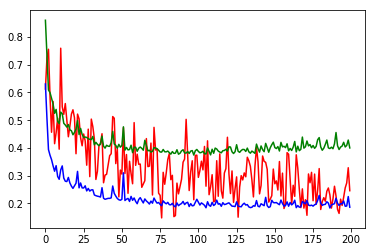

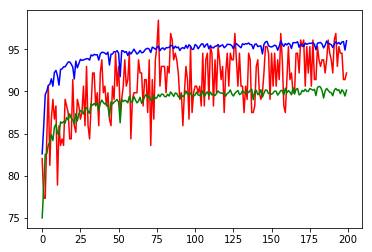

98.4375	3850
90.6	9100
96.01	10000


In [97]:
#plot learining curves
# t = len(l_train)

# print(len(l_train))
a = 225
b = 250
    
plt.plot(l_train[1:], 'r')
plt.plot(l_val[1:], 'g')
plt.plot(l_test[1:], 'b')
plt.show()

plt.plot(train_accuracy[1:], 'r')
plt.plot(valid_accuracy[1:], 'g')
plt.plot(test_accuracy[1:], 'b')
plt.show()

print(max(train_accuracy), end = "\t")
print(50 * np.argmax(train_accuracy))
print(max(valid_accuracy), end = "\t")
print(50 * np.argmax(valid_accuracy))
print(max(test_accuracy), end = "\t")
print(50 * np.argmax(test_accuracy))